# Import Modules

In [ ]:
import numpy as np
import pandas as pd

import cv2

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from PIL import Image

# Load the Image

In [ ]:
img = cv2.imread('/content/water_body_1.jpg')
expected_mask = cv2.imread('/content/water_body_1_mask.jpg')

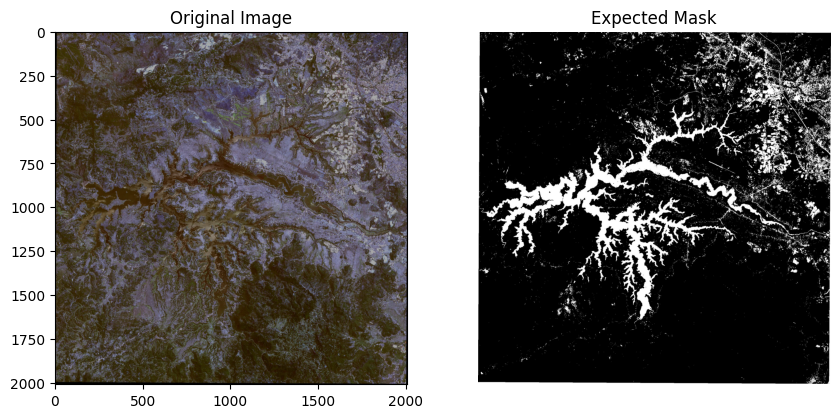

In [ ]:
plt.figure(figsize=(10, 10))
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(expected_mask)
plt.title('Expected Mask')

plt.axis('off')
plt.show()

In [ ]:
# Image Array
img

array([[[1, 0, 7],
        [1, 0, 7],
        [0, 0, 7],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 0, 7],
        [1, 0, 5],
        [0, 0, 7],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 0, 5],
        [1, 0, 4],
        [0, 0, 5],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
img.shape

(2009, 2007, 3)

# Convert to HSV
- [Changing Colourspaces](https://docs.opencv.org/3.2.0/df/d9d/tutorial_py_colorspaces.html)
- [Stackoverflow](https://stackoverflow.com/questions/42198408/python-opencv-convert-pixel-from-bgr-to-hsv)


In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv

array([[[176, 255,   7],
        [176, 255,   7],
        [  0, 255,   7],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[176, 255,   7],
        [174, 255,   5],
        [  0, 255,   7],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[174, 255,   5],
        [173, 255,   4],
        [  0, 255,   5],
        ...,
        [ 60, 255,   1],
        [ 60, 255,   1],
        [ 60, 255,   1]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

Text(0.5, 1.0, 'HSV Image')

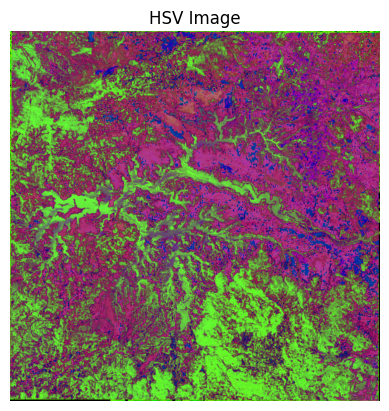

In [ ]:
plt.imshow(hsv)
plt.axis('off')
plt.title('HSV Image')

# Blur

In [ ]:
blur = cv2.GaussianBlur(hsv,(5,5),0)
blur = cv2.bilateralFilter(blur,3,30,30)
blur

array([[[144, 255,   6],
        [123, 255,   6],
        [ 52, 255,   6],
        ...,
        [  9,  36,   0],
        [  9,  36,   0],
        [  9,  36,   0]],

       [[143, 253,   6],
        [123, 253,   5],
        [ 53, 254,   5],
        ...,
        [ 18,  78,   0],
        [ 18,  78,   0],
        [ 18,  78,   0]],

       [[136, 248,   4],
        [120, 247,   5],
        [ 54, 248,   4],
        ...,
        [ 41, 176,   1],
        [ 41, 176,   1],
        [ 41, 176,   1]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

Text(0.5, 1.0, 'Blur Image')

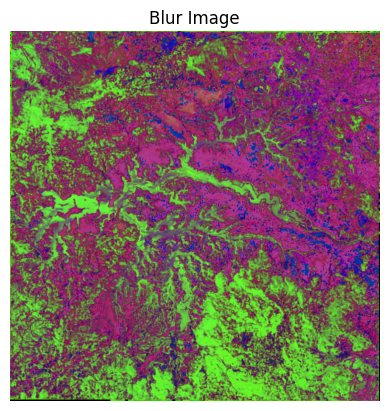

In [ ]:
plt.imshow(blur)
plt.axis('off')
plt.title('Blur Image')

Text(0.5, 1.0, 'Blur Image')

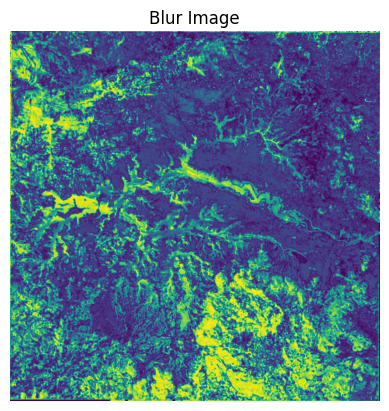

In [ ]:
# Take only one Channel

ex = blur[:,:,1]


plt.imshow(ex)
plt.axis('off')
plt.title('Blur Image')

# Plot Histograms

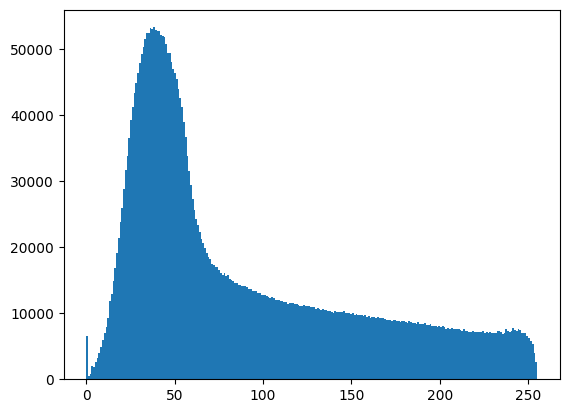

In [ ]:
hist = plt.hist(ex.flatten(),bins=256)

# From here

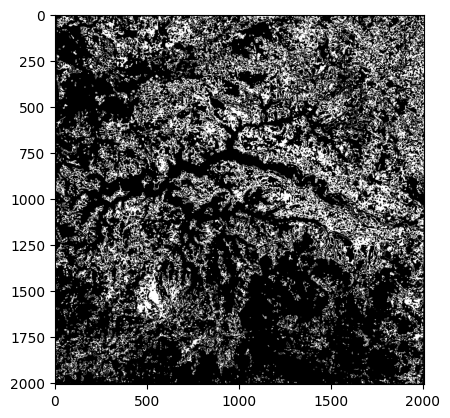

In [ ]:
dummy = np.zeros_like(ex)
dummy[np.where((ex>20) & (ex<50))] = 1
plt.imshow(dummy, cmap='gray')